In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse
from sqlalchemy import create_engine

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

In [3]:
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
df = pd.read_sql_query('select * from houseprices',con=engine)

engine.dispose()

# Creating the model

In [4]:
numeric_variables = ['overallqual','firstflrsf','totrmsabvgrd']
variables = numeric_variables + ['neighborhood','exterior1st','saleprice']

In [5]:
df2 = pd.get_dummies(df[variables], drop_first=True)
X = df2.drop('saleprice', axis=1)
y = df2.saleprice

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 625)

In [8]:
X_train = sm.add_constant(X_train)
results = sm.OLS(y_train,X_train).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     101.9
Date:                Sat, 24 Jul 2021   Prob (F-statistic):               0.00
Time:                        15:13:14   Log-Likelihood:                -13925.
No. Observations:                1168   AIC:                         2.793e+04
Df Residuals:                    1127   BIC:                         2.814e+04
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -1.021e+05   1.67e+04     -6.133      0.000   -1.35e+05   -6.95e+04
overallqual           2.229e+04   1290.069     17.277      0.000    1.98e+04    2.48e+04
firstflrsf              39.5669      3.834     10.320      0.000      32.045      47.089
totrmsabvgrd          9431.1003    815.860     11.560      0.000    7830.325     1.1e+04
neighborhood_Blueste  1.699e+04   2.84e+04      0.598      0.550   -3.87e+04    7.27e+04
neighborhood_BrDale  -8795.9267   1.46e+04     -0.603      0.547   -3.74e+04    1.98e+04
neighborhood_BrkSide   1.76e+04    1.2e+04      1.462      0.144   -6014.279    4.12e+04
neighborhood_ClearCr  5.723e+04   1.32e+04      4.333      0.000    3.13e+04    8.32e+04
neighborhood_CollgCr  2.726e+04   1.06e+04      2.579      0.010    6522.420     4.8e+04
neighborhood_Crawfor  4.527e+04    1.2e+04      3.772      0.000    2.17e+04    6.88e+04
neighborhood_Edwards  2499.7464   1.14e+04      0.219      0.826   -1.98e+04    2.48e+04
neighborhood_Gilbert  2.922e+04   1.12e+04      2.608      0.009    7235.678    5.12e+04
neighborhood_IDOTRR  -3870.3554   1.26e+04     -0.306      0.759   -2.87e+04    2.09e+04
neighborhood_MeadowV -7950.4818   1.65e+04     -0.483      0.629   -4.03e+04    2.44e+04
neighborhood_Mitchel  2.118e+04   1.19e+04      1.779      0.076   -2179.954    4.45e+04
neighborhood_NAmes    1.226e+04   1.08e+04      1.137      0.256   -8893.638    3.34e+04
neighborhood_NPkVill   1.18e+04    1.9e+04      0.622      0.534   -2.54e+04     4.9e+04
neighborhood_NWAmes    1.78e+04   1.15e+04      1.549      0.122   -4752.243    4.04e+04
neighborhood_NoRidge  9.989e+04    1.2e+04      8.343      0.000    7.64e+04    1.23e+05
neighborhood_NridgHt  7.594e+04   1.11e+04      6.846      0.000    5.42e+04    9.77e+04
neighborhood_OldTown   472.5692   1.13e+04      0.042      0.967   -2.17e+04    2.26e+04
neighborhood_SWISU    2169.4057   1.31e+04      0.165      0.869   -2.36e+04     2.8e+04
neighborhood_Sawyer   1.838e+04   1.16e+04      1.585      0.113   -4378.611    4.11e+04
neighborhood_SawyerW  2.138e+04   1.16e+04      1.840      0.066   -1423.555    4.42e+04
neighborhood_Somerst  4.016e+04    1.1e+04      3.648      0.000    1.86e+04    6.18e+04
neighborhood_StoneBr  8.292e+04   1.33e+04      6.256      0.000    5.69e+04    1.09e+05
neighborhood_Timber   4.648e+04    1.2e+04      3.860      0.000    2.28e+04    7.01e+04
neighborhood_Veenker  6.981e+04   1.58e+04      4.424      0.000    3.88e+04    1.01e+05
exterior1st_AsphShn  -5.309e+04   3.86e+04     -1.374      0.170   -1.29e+05    2.27e+04
exterior1st_BrkComm  -4876.0239   2.84e+04     -0.172      0.864   -6.05e+04    5.08e+04
exterior1st_BrkFace   2.208e+04   1.17e+04      1.884      0.060    -910.513    4.51e+04
exterior1st_CBlock    2.769e+04   3.86e+04      0.718    

The R-squared is 0.783 meaning 78 percent of the variability in the output is explained by this model

# Making predictions

In [9]:
X_test = sm.add_constant(X_test)
y_preds = results.predict(X_test)

# Evaluating predictions

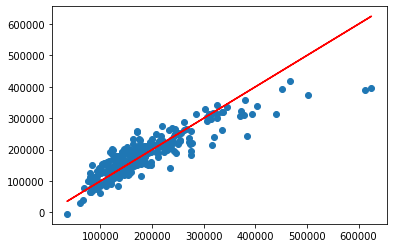

In [10]:
plt.scatter(y_test,y_preds)
plt.plot(y_test, y_test, color="red")

The predictions seem close to the real values.  However there are some values with large residuals.  This may be reflected in RMSE.

In [11]:
def mape(y_values, y_preds):
    return np.mean(np.abs(y_values-y_preds)/y_values)

In [13]:
def print_errors(y_test, y_preds):
    print("The mean absolute error of the model: ",mean_absolute_error(y_test, y_preds))
    print("The mean absolute percentage error of the model: ",mape(y_test, y_preds))
    print("The mean square error of the model: ",mse(y_test,y_preds))
    print("The root mean square error of the model: ",rmse(y_test,y_preds))

In [14]:
print_errors(y_test, y_preds)

The mean absolute error of the model:  25785.776316677395
The mean absolute percentage error of the model:  0.15141738251637796
The mean square error of the model:  1474888632.1480362
The root mean square error of the model:  38404.27882603755


Those values seem high.  On average the difference between the true sale price and predicted sale price is about 25,700 dollars.  Thinking about it, that is not too bad as many houses sell for 100k or more.

In [15]:
df['saleprice'].mean()

180921.19589041095

In fact the mean sale price is almost 200,000 dollars.  As was expected, MSE and RMSE are higher than MAE.

# Improving the model

To try to improve the model I'm going to add kitchen quality to the model

## Creating the model

In [16]:
variables2 = variables + ['kitchenqual']

In [17]:
df2 = pd.get_dummies(df[variables2], drop_first=True)
X = df2.drop('saleprice', axis=1)
y = df2.saleprice

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 625)

In [19]:
X_train = sm.add_constant(X_train)
results = sm.OLS(y_train,X_train).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     104.7
Date:                Sat, 24 Jul 2021   Prob (F-statistic):               0.00
Time:                        15:49:46   Log-Likelihood:                -13878.
No. Observations:                1168   AIC:                         2.784e+04
Df Residuals:                    1124   BIC:                         2.807e+04
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -2.316e+04    1.8e+04     -1.285      0.199   -5.85e+04    1.22e+04
overallqual           1.856e+04   1327.073     13.985      0.000     1.6e+04    2.12e+04
firstflrsf              34.8281      3.720      9.362      0.000      27.529      42.127
totrmsabvgrd          9082.8556    785.959     11.556      0.000    7540.744    1.06e+04
neighborhood_Blueste  2.237e+04   2.74e+04      0.816      0.414   -3.14e+04    7.61e+04
neighborhood_BrDale  -4971.1994   1.41e+04     -0.352      0.725   -3.27e+04    2.28e+04
neighborhood_BrkSide  1.796e+04   1.17e+04      1.538      0.124   -4956.874    4.09e+04
neighborhood_ClearCr   5.41e+04   1.27e+04      4.252      0.000    2.91e+04    7.91e+04
neighborhood_CollgCr  2.691e+04   1.02e+04      2.646      0.008    6957.466    4.69e+04
neighborhood_Crawfor  4.917e+04   1.16e+04      4.249      0.000    2.65e+04    7.19e+04
neighborhood_Edwards  1473.8668   1.11e+04      0.133      0.894   -2.02e+04    2.32e+04
neighborhood_Gilbert  3.194e+04   1.08e+04      2.954      0.003    1.07e+04    5.32e+04
neighborhood_IDOTRR  -3284.0887   1.23e+04     -0.268      0.789   -2.73e+04    2.08e+04
neighborhood_MeadowV  -873.0757   1.59e+04     -0.055      0.956   -3.21e+04    3.03e+04
neighborhood_Mitchel  2.474e+04   1.15e+04      2.144      0.032    2095.951    4.74e+04
neighborhood_NAmes    1.465e+04   1.05e+04      1.401      0.162   -5875.523    3.52e+04
neighborhood_NPkVill  1.407e+04   1.83e+04      0.768      0.443   -2.19e+04       5e+04
neighborhood_NWAmes   2.183e+04   1.11e+04      1.962      0.050      -0.847    4.37e+04
neighborhood_NoRidge  1.036e+05   1.15e+04      8.996      0.000     8.1e+04    1.26e+05
neighborhood_NridgHt  6.289e+04   1.08e+04      5.818      0.000    4.17e+04    8.41e+04
neighborhood_OldTown  1745.7035   1.09e+04      0.160      0.873   -1.97e+04    2.32e+04
neighborhood_SWISU    4860.1637   1.28e+04      0.381      0.703   -2.02e+04    2.99e+04
neighborhood_Sawyer   1.964e+04   1.12e+04      1.749      0.081   -2394.681    4.17e+04
neighborhood_SawyerW    2.2e+04   1.12e+04      1.967      0.049      51.634    4.39e+04
neighborhood_Somerst  3.951e+04   1.06e+04      3.731      0.000    1.87e+04    6.03e+04
neighborhood_StoneBr   7.65e+04   1.28e+04      5.984      0.000    5.14e+04    1.02e+05
neighborhood_Timber    4.79e+04   1.16e+04      4.128      0.000    2.51e+04    7.07e+04
neighborhood_Veenker   6.37e+04   1.52e+04      4.190      0.000    3.39e+04    9.35e+04
exterior1st_AsphShn  -4.545e+04   3.72e+04     -1.222      0.222   -1.18e+05    2.75e+04
exterior1st_BrkComm  -4168.7638   2.74e+04     -0.152      0.879   -5.79e+04    4.95e+04
exterior1st_BrkFace   2.213e+04   1.13e+04      1.961      0.050     -16.891    4.43e+04
exterior1st_CBlock     2.47e+04   3.71e+04      0.666    

## Evaluating the new model

The model looks promising, R squared, adjusted R squared have incread and AIC and BIC have decreased.

## Making predictions and evaluating the model

In [22]:
X_test = sm.add_constant(X_test)
y_preds = results.predict(X_test)

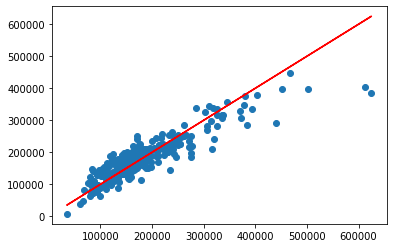

In [23]:
plt.scatter(y_test,y_preds)
plt.plot(y_test, y_test, color="red")

From the scatterplot the predictions seem similar to the previous model.  Looking at the metrics... 

In [24]:
print_errors(y_test, y_preds)

The mean absolute error of the model:  24847.701222678606
The mean absolute percentage error of the model:  0.14512024941225213
The mean square error of the model:  1340027958.8007991
The root mean square error of the model:  36606.392321571366


All metrics on the test set were an improvement.  This model is a better choice.